# Analiza zależności ilości kibiców w baseball mlb

In [5]:
import pandas as pd

data = pd.read_csv("baseball_reference_2016_clean.csv")

data

Unnamed: 0  attendance              away_team  away_team_errors  \
0              0     40030.0          New York Mets                 1   
1              1     21621.0  Philadelphia Phillies                 0   
2              2     12622.0        Minnesota Twins                 0   
3              3     18531.0   Washington Nationals                 0   
4              4     18572.0       Colorado Rockies                 1   
...          ...         ...                    ...               ...   
2458        2458     31042.0      Toronto Blue Jays                 2   
2459        2459     39500.0    St. Louis Cardinals                 0   
2460        2460     20098.0   San Francisco Giants                 0   
2461        2461     17883.0         Detroit Tigers                 0   
2462        2462     10298.0         Boston Red Sox                 1   

      away_team_hits  away_team_runs        date field_type   game_type  \
0                  7               3  2016-04-03   on grass  Night Game   
1                  5               2  2016-04-06   on grass  Night Game   
2                  5               2  2016-04-06   on grass  Night Game   
3                  8               3  2016-04-06   on grass  Night Game   
4                  8               4  2016-04-06   on grass    Day Game   
...              ...             ...         ...        ...         ...   
2458               7               5  2016-04-03    on turf    Day Game   
2459               5               1  2016-04-03   on grass    Day Game   
2460               6               3  2016-04-06   on grass    Day Game   
2461              13               7  2016-04-06   on grass    Day Game   
2462              10               6  2016-04-06   on grass  Night Game   

                 home_team  ...  temperature  wind_speed  \
0       Kansas City Royals  ...         74.0        14.0   
1          Cincinnati Reds  ...         55.0        24.0   
2        Baltimore Orioles  ...         48.0         7.0   
3           Atlanta Braves  ...         65.0        10.0   
4     Arizona Diamondbacks  ...         77.0         0.0   
...                    ...  ...          ...         ...   
2458        Tampa Bay Rays  ...         72.0         0.0   
2459    Pittsburgh Pirates  ...         39.0        14.0   
2460     Milwaukee Brewers  ...         66.0         0.0   
2461         Miami Marlins  ...         71.0         0.0   
2462     Cleveland Indians  ...         60.0         7.0   

             wind_direction       sky total_runs game_hours_dec  \
0        from Right to Left     Sunny          7       3.216667   
1        from Right to Left  Overcast          5       2.383333   
2          out to Leftfield   Unknown          6       3.183333   
3        from Right to Left    Cloudy          4       2.883333   
4      in unknown direction   In Dome          7       2.650000   
...                     ...       ...        ...            ...   
2458   in unknown direction   In Dome          8       2.850000   
2459       out to Leftfield   Unknown          5       3.033333   
2460   in unknown direction   In Dome          7       3.316667   
2461   in unknown direction   In Dome         10       3.366667   
2462       out to Leftfield   Unknown         13       3.483333   

              season  home_team_win home_team_loss home_team_outcome  
0     regular season              1              0               Win  
1     regular season              1              0               Win  
2     regular season              1              0               Win  
3     regular season              0              1              Loss  
4     regular season              0              1              Loss  
...              ...            ...            ...               ...  
2458  regular season              0              1              Loss  
2459  regular season              1              0               Win  
2460  regular season              1              0             

In [6]:
data.columns

Index(['Unnamed: 0', 'attendance', 'away_team', 'away_team_errors',
       'away_team_hits', 'away_team_runs', 'date', 'field_type', 'game_type',
       'home_team', 'home_team_errors', 'home_team_hits', 'home_team_runs',
       'start_time', 'venue', 'day_of_week', 'temperature', 'wind_speed',
       'wind_direction', 'sky', 'total_runs', 'game_hours_dec', 'season',
       'home_team_win', 'home_team_loss', 'home_team_outcome'],
      dtype='object')

## Pogoda

![image](sky.jpg)

In [7]:
data['sky'].unique()

array(['Sunny', 'Overcast', 'Unknown', 'Cloudy', 'In Dome', 'Drizzle',
       'Rain', 'Night'], dtype=object)

In [8]:
sunny = data[data['sky'] == 'Sunny']
overcast = data[data['sky'] == 'Overcast']
cloudy = data[data['sky'] == 'Cloudy']
in_dome = data[data['sky'] == 'In Dome']
drizzle = data[data['sky'] == 'Drizzle']
rain = data[data['sky'] == 'Rain']
night = data[data['sky'] == 'Night']

### Średnia ilość kibiców w zależności od pogody

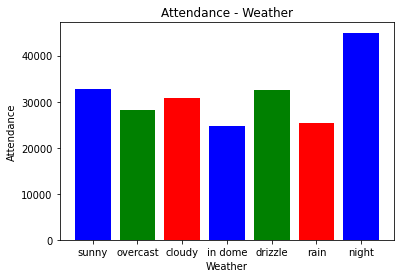

In [9]:
import matplotlib.pyplot as plt
  
left = [1, 2, 3, 4, 5, 6, 7]

height = [sunny['attendance'].mean(), overcast['attendance'].mean(), cloudy['attendance'].mean(), 
in_dome['attendance'].mean(), drizzle['attendance'].mean(), rain['attendance'].mean(), night['attendance'].mean()]

tick_label = ['sunny', 'overcast', 'cloudy', 'in dome', 'drizzle', 'rain', 'night']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green', 'red'])
  
plt.xlabel('Weather')
plt.ylabel('Attendance')
plt.title('Attendance - Weather')

plt.show()

### Mediana

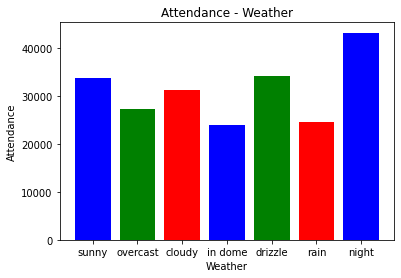

In [10]:
import matplotlib.pyplot as plt
  
left = [1, 2, 3, 4, 5, 6, 7]

height = [sunny['attendance'].median(), overcast['attendance'].median(), cloudy['attendance'].median(), 
in_dome['attendance'].median(), drizzle['attendance'].median(), rain['attendance'].median(), night['attendance'].median()]

tick_label = ['sunny', 'overcast', 'cloudy', 'in dome', 'drizzle', 'rain', 'night']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green', 'red'])
  
plt.xlabel('Weather')
plt.ylabel('Attendance')
plt.title('Attendance - Weather')

plt.show()

W nocy prawdopodobnie najwięcej, gdyż większa grupa odbiorców ma dostęp do meczy online z całego świata.  
Pod kopułą może być najmniej widzów, gdyż takie stadiony mają mniejsze trybuny.

## Dzień tygodnia

![image2](week.jpg)

In [11]:
data['day_of_week'].unique()

array(['Sunday', 'Wednesday', 'Tuesday', 'Monday', 'Thursday', 'Saturday',
       'Friday'], dtype=object)

In [17]:
monday = data[data['day_of_week'] == 'Monday']
tuesday = data[data['day_of_week'] == 'Tuesday']
wednesday = data[data['day_of_week'] == 'Wednesday']
thursday = data[data['day_of_week'] == 'Thursday']
friday = data[data['day_of_week'] == 'Friday']
saturday = data[data['day_of_week'] == 'Saturday']
sunday = data[data['day_of_week'] == 'Sunday']

### Średnia ilość kibiców w danym dniu

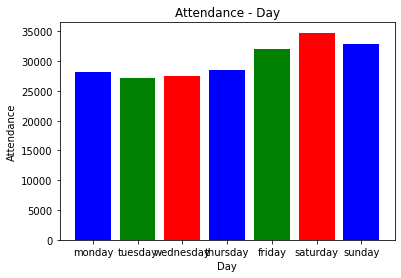

In [13]:
import matplotlib.pyplot as plt
  
left = [1, 2, 3, 4, 5, 6, 7]

height = [monday['attendance'].mean(), tuesday['attendance'].mean(), wednesday['attendance'].mean(), 
thursday['attendance'].mean(), friday['attendance'].mean(), saturday['attendance'].mean(), sunday['attendance'].mean()]

tick_label = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green', 'red'])
  
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.title('Attendance - Day')

plt.show()

### Mediana

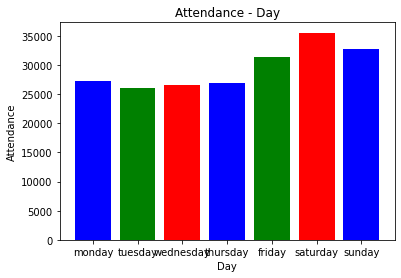

In [14]:
import matplotlib.pyplot as plt
  
left = [1, 2, 3, 4, 5, 6, 7]

height = [monday['attendance'].median(), tuesday['attendance'].median(), wednesday['attendance'].median(), 
thursday['attendance'].median(), friday['attendance'].median(), saturday['attendance'].median(), sunday['attendance'].median()]

tick_label = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green', 'red'])
  
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.title('Attendance - Day')

plt.show()

Najwięcej kibiców jest w weekendy.

## Zwycięstwo / porażka gospodarzy
![image3](win.jpg)

In [15]:
data['home_team_outcome'].unique()

array(['Win', 'Loss'], dtype=object)

In [16]:
win = data[data['home_team_outcome'] == 'Win']
loss = data[data['home_team_outcome'] == 'Loss']

### Średnia ilość kibiców przy wygraniu/przegraniu gospodarzy

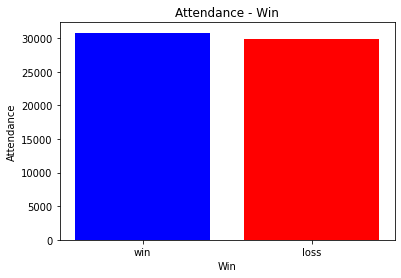

In [18]:
left = [1, 2]

height = [win['attendance'].mean(), loss['attendance'].mean()]

tick_label = ['win', 'loss']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'red'])
  
plt.xlabel('Win')
plt.ylabel('Attendance')
plt.title('Attendance - Win')

plt.show()

### Mediana

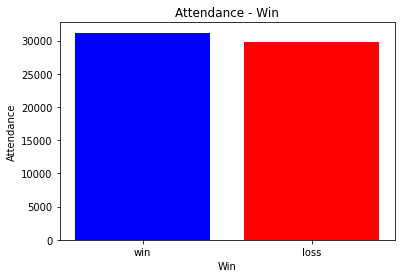

In [19]:
left = [1, 2]

height = [win['attendance'].median(), loss['attendance'].median()]

tick_label = ['win', 'loss']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'red'])
  
plt.xlabel('Win')
plt.ylabel('Attendance')
plt.title('Attendance - Win')

plt.show()

Nie ma to wpływu, raczej nie jest tak, że widać przegraną przed końcem i przez to kibice wychodzą. A nawet jeśli to działa to w miarę równomiernie w obie strony.

## Zwycięstwa w kolejnych meczach

![image4](win-streak.png)

In [20]:
data['away_team'].unique()

array(['New York Mets', 'Philadelphia Phillies', 'Minnesota Twins',
       'Washington Nationals', 'Colorado Rockies', 'Seattle Mariners',
       'Toronto Blue Jays', 'Los Angeles Dodgers', 'St. Louis Cardinals',
       'Chicago White Sox', 'Houston Astros', 'San Francisco Giants',
       'Detroit Tigers', 'Texas Rangers', 'San Diego Padres',
       'Los Angeles Angels of Anaheim', 'Miami Marlins',
       'Kansas City Royals', 'Pittsburgh Pirates', 'Cincinnati Reds',
       'Atlanta Braves', 'New York Yankees', 'Chicago Cubs',
       'Arizona Diamondbacks', 'Milwaukee Brewers', 'Baltimore Orioles',
       'Cleveland Indians', 'Oakland Athletics', 'Boston Red Sox',
       'Tampa Bay Rays'], dtype=object)

In [26]:
mets = data[data['away_team'] == 'New York Mets']

Text(0.5, 1.0, 'Attendance - Win/Lose')

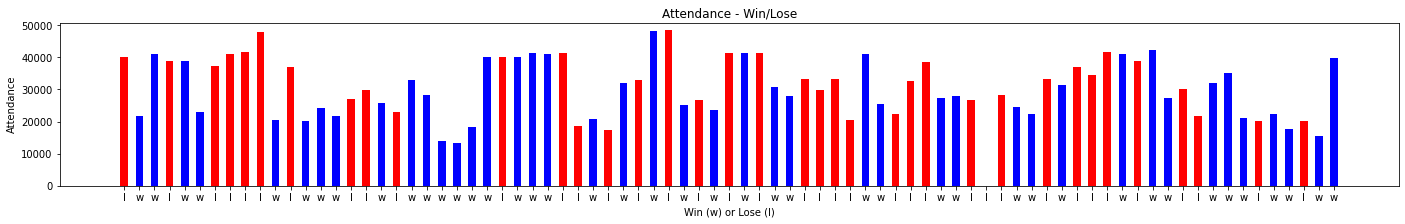

In [27]:
left = [i for i in range(len(mets))]

height = [i for i in mets['attendance']]

tick_label = ['l' if [i for i in mets['home_team_outcome']][i] == 'Win' else 'w' for i in range(len(mets))]

plt.figure(figsize=(24, 3))  # width:20, height:3
plt.bar(left, height, tick_label = tick_label,
        width = 0.5, color = ['red' if [i for i in mets['home_team_outcome']][i] == 'Win' else 'blue' for i in range(len(mets))])
  
plt.xlabel('Win (w) or Lose (l)')
plt.ylabel('Attendance')
plt.title('Attendance - Win/Lose')

In [28]:
philadelphia = data[data['away_team'] == 'Philadelphia Phillies']

Text(0.5, 1.0, 'Attendance - Win/Lose')

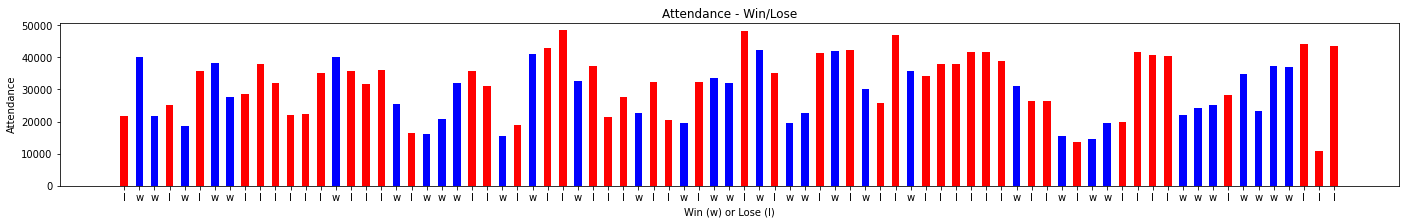

In [29]:
left = [i for i in range(len(philadelphia))]

height = [i for i in philadelphia['attendance']]

tick_label = ['l' if [i for i in philadelphia['home_team_outcome']][i] == 'Win' else 'w' for i in range(len(philadelphia))]

plt.figure(figsize=(24, 3))  # width:20, height:3
plt.bar(left, height, tick_label = tick_label,
        width = 0.5, color = ['red' if [i for i in philadelphia['home_team_outcome']][i] == 'Win' else 'blue' for i in range(len(philadelphia))])
  
plt.xlabel('Win (w) or Lose (l)')
plt.ylabel('Attendance')
plt.title('Attendance - Win/Lose')

Czasami można wywnioskować, że po wygranym meczu przychodzi więcej kibiców na następny, ale nie zawsze, to raczej nie jest częsta zasada.